In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, rosen, rosen_der
import math
import numpy.linalg as LA

In [0]:
#Задаём константы
tol = 0.01
la = 13 # l у основания
lb = 13 # l у основания
lc = 4.25 #L
ld = 4.25 #L
d = 12
work_space = []

In [0]:
#     D1=(
#         2 * (-1*(x+d/2)/(y)) * ( (x+d/2)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )
#         )**2
#         -4*(1 + (x+d/2)**2/(y**2) ) * ( 
#                                         ( (x+d/2)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )
#                                         )**2 -la**2
#                                      ) 
#     D2=(
#         2 * (-1*(x-d/2)/(y)) * ( (x-d/2)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )
#         )**2
#         -4*(1 + (x-d/2)**2/(y**2) ) * ( 
#                                         ( (x-d/2)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )
#                                         )**2 -la**2
#                                      )     

In [0]:
#задаём функцию, работающую, как чёрный ящик, которая принимает точку и d и говорит, попали ли мы в рабочую область
def is_inside(x, y, d):
    D1=(2 * (-1*(x)/(y)) * ( (x)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) ))**2 - 4*(1 + ((x)**2)/(y**2) ) * ( ( (x)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )**2 - la**2) 
    D2=(2 * (-1*(x-d)/(y)) * ( (x-d)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) ))**2 - 4*(1 + ((x-d)**2)/(y**2) ) * ( ( (x-d)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )**2 - la**2)     
    if D1 >= 0 and D2 >= 0:
        work_space.append([x,y])
        return 1
    return 0

Robot work area:


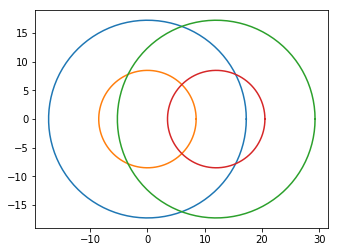

In [5]:
# окружности в питоне легче всего задавать через сферические координаты
# тета меняется от 0 до 2pi
theta = np.linspace(0, 2*np.pi, 100)

x1 = (la+lc)*np.cos(theta)
x2 = (la+lc)*np.sin(theta)
x3 = 2*lc*np.cos(theta)
x4 = 2*lc*np.sin(theta)
x5 = (la+lc)*np.cos(theta)+d
x6 = (la+lc)*np.sin(theta)
x7 = 2*lc*np.cos(theta)+d
x8 = 2*lc*np.sin(theta)

#задаю сетку для расчёта рабочей области
gr_x = np.linspace(-20, 20, 300)
gr_y = np.linspace(-20, 20, 300)
# gr_x = np.linspace(-(la+lc), la+lc+d, 250)
# gr_y = np.linspace(-(la+lc), la+lc+d, 250)
gr_X, gr_Y = np.meshgrid(gr_x,gr_y)
    
fig, ax = plt.subplots(1)
ax.plot(x1, x2)
ax.plot(x3, x4)
ax.plot(x5, x6)
ax.plot(x7, x8)
ax.set_aspect(1)
print('Robot work area:')
# plt.show()

# plt.scatter(gr_X, gr_Y, color = 'black')
# plt.show()

In [0]:
#функция подсчёта площади
def count_area_new(d_iter):
    S_square=len(gr_x)*len(gr_y) #50 000
    number_of_points = len(gr_x)*len(gr_y) #50 000
    number_inside = 0
    for i in range(len(gr_x)):
        for j in range(len(gr_y)):
            number_inside+=is_inside(gr_x[i], gr_y[j], d_iter)
#             is_gran(gr_x[i], gr_y[j], d_iter)
    S=(S_square*number_inside/number_of_points)/2 # /2 из-за того, что области на графике две, но в реальности она одна
    return S

In [7]:
count_area_new(d)

5113.0

In [0]:
#work_space

In [0]:
# #d_iter = 1*l1min*2
# d_iter = 0
# step = 1
# d_array = []
# while d_iter < 1*la*2+1*lc*2:
#     d_array.append([d_iter, count_area_new(d_iter)])
#     d_iter+=step

In [0]:
# максимальная рабочая область
# max(d_array)

In [0]:
# d_array

In [0]:
# plt.plot(*zip(*d_array))

Robot work area:


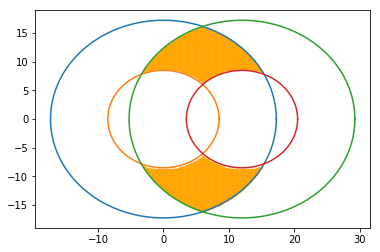

In [10]:
# отрисовка рабочей области
print('Robot work area:')
fig, ax = plt.subplots(1)
ax.plot(x1, x2)
ax.plot(x3, x4)
ax.plot(x5, x6)
ax.plot(x7, x8)
plt.scatter(*zip(*work_space), color = 'orange', s=0.2)
# plt.scatter(*zip(*gran), color = 'black')
plt.show()

In [0]:
# #генерирую всевозможные углы
# theta1 = np.linspace(np.pi/3, np.pi/3, 60)
# theta2 = np.linspace(2*np.pi/3, 2*np.pi/3, 60)
# phi1 = np.linspace(0, 2*np.pi, 60)
# phi2 = np.linspace(0, 2*np.pi, 60)
# sing1 = []
# sing2 = []
#генерирую всевозможные углы
theta1 = np.linspace(1.09106769, 1.09106769, 60)
theta2 = np.linspace(2.05052496, 2.05052496, 60)
phi1 = np.linspace(0, 2*np.pi, 60)
phi2 = np.linspace(0, 2*np.pi, 60)
sing1 = []
sing2 = []

In [0]:
#функция, определяющая сингулярность
# def dj(t1,t2,p1,p2):
#     if p1==t1 or p1==t1+np.pi:
#         sing.append([t1,t2,p1,p2])
#         return 0
#     if p2==t2 or p2==t2+np.pi:
#         sing.append([t1,t2,p1,p2])
#         return 0
#     if p1==p2 or p2==p1+np.pi:
#         sing.append([t1,t2,p1,p2])
#         return 0
#     return 0

def dj(t1,t2,p1,p2):
    if np.abs(p1-p2) < tol:
        sing1.append([t1,t2,p1,p2])
        return 0
#     if (p2-p1-np.pi) < tol:
#         sing2.append([t1,t2,p1,p2])
#         return 0
    return 0

In [0]:
#перебираю все комбинации углов на удовлетворение условиям сингулярности
for i in range(len(theta1)):
    for j in range(len(theta2)):
        for k in range(len(phi1)):
            for m in range(len(phi2)):
                dj(theta1[i], theta2[j], phi1[k], phi2[m])

In [14]:
sing2

[]

In [15]:
len(sing2)

0

In [16]:
len(sing1)

216000

In [0]:
# for i in range(len(sing)):
#     if sing[i][0]==sing[i][2]:
#         print ("0: "+str(sing[i][0]))
#         print ("2: "+str(sing[i][2]))

Robot singularity area:


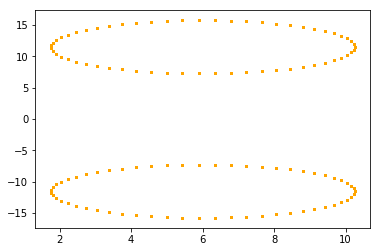

In [18]:
#HERE

#отсеиваю те углы, которые не подходят по условиям закрытости цепи и получаю коордитаны линий сингулярности в х и у
#с чистыми уравнениями связи
sing_xy1 = []
sing_xy2 = []
aa = []
for i in range(len(sing1)):
    #aa.append(np.abs(lc*np.cos(sing1[i][0])+la*np.cos(sing1[i][2]) - ( d + lc*np.cos(sing1[i][1])+la*np.cos(sing1[i][3])) ))
    if np.abs(la*np.cos(sing1[i][0])+lc*np.cos(sing1[i][2]) - ( d + la*np.cos(sing1[i][1])+lc*np.cos(sing1[i][3])) ) <= tol:
#         print("aaaaa")
        if np.abs(la*np.sin(sing1[i][0])+lc*np.sin(sing1[i][2]) - la*np.sin(sing1[i][1])-lc*np.sin(sing1[i][3]) ) <= tol:
#             print("bbbbb")
            sing_xy1.append( [ la*np.cos(sing1[i][0])+lc*np.cos(sing1[i][2]), la*np.sin(sing1[i][0])+lc*np.sin(sing1[i][2])] )
            sing_xy2.append( [ la*np.cos(sing1[i][0])+lc*np.cos(sing1[i][2]), -la*np.sin(sing1[i][0])-lc*np.sin(sing1[i][2])] )    
#строю линии сингулярности в координатах х у
print('Robot singularity area:')
plt.scatter(*zip(*sing_xy1), color = 'orange', s=0.5)
plt.scatter(*zip(*sing_xy2), color = 'orange', s=0.5)
plt.show()

In [0]:
np.min(aa)

In [0]:
np.cos(np.pi-0.0001)

In [0]:
#отсеиваю те углы, которые не подходят по условиям закрытости цепи и получаю коордитаны линий сингулярности в х и у
#после упрощений
sing_xy1 = []
for i in range(len(sing1)):
    if np.abs(sing1[i][0] - np.pi + sing1[i][1] ) <= 10: #из-за погрешности заполнения теты (np.pi-3.088345320478=0.05324733311179308)
#         print("aaa")
        if np.abs(2*lc*np.cos(sing1[i][0]) - d ) <= 2*lc*45:
#             print("bbbbb")
            sing_xy1.append( [ lc*np.cos(sing1[i][0])+la*np.cos(sing1[i][2]), lc*np.sin(sing1[i][0])+la*np.sin(sing1[i][2])] )
    
#строю линии сингулярности в координатах х у
print('Robot singularity area:')
plt.scatter(*zip(*sing_xy1), color = 'orange', s=0.5)
plt.show()

In [0]:
#строю линии сингулярности в координатах х у
print('Robot singularity area:')
plt.scatter(*zip(*work_space), color = 'black', s=20)
plt.scatter(*zip(*sing_xy1), color = 'orange', s=0.5)
#plt.savefig('C:\\Users\Andrej\Desktop\foo.png')
plt.show()

In [0]:
output = []
trends = []

for i in range(len(sing1)):
    trends.append([sing1[i][1]])

for x in trends:
    if x not in output:
        output.append(x)
print (output)

In [0]:
np.pi-3.088345320478

In [0]:
import os
cwd = os.getcwd()
cwd

In [0]:
#отсеиваю те углы, которые не подходят по условиям закрытости цепи и получаю коордитаны линий сингулярности в х и у
sing_xy = []

for i in range(len(sing)):
    if np.abs(lc*np.cos(sing[i][0])+la*np.cos(sing[i][2]) - ( d + lc*np.cos(sing[i][1])+la*np.cos(sing[i][3])) ) <= tol:
        print("asda")
        if np.abs(lc*np.sin(sing[i][0])+la*np.sin(sing[i][2]) - lc*np.sin(sing[i][1])-la*np.sin(sing[i][3]) ) <= tol:
            sing_xy.append( [ lc*np.cos(sing[i][0])+la*np.cos(sing[i][2]), lc*np.sin(sing[i][0])+la*np.sin(sing[i][2])] )
            


In [0]:
#pos


#отсеиваю те углы, которые не подходят по условиям закрытости цепи и получаю коордитаны линий сингулярности в х и у
#после упрощений
sing_xy1 = []
for i in range(len(sing1)):
    x1=lc*np.cos(sing1[i][2])+la*np.cos(sing1[i][1])+d/2
    x2=lc*np.cos(sing1[i][0])+la*np.cos(sing1[i][3])-d/2    
    y1=lc*np.sin(sing1[i][2])+la*np.sin(sing1[i][1])
    y2=lc*np.sin(sing1[i][0])+la*np.sin(sing1[i][3])
    if np.abs(x1 - x2) < 0.01 and np.abs(y1 - y2) < 0.01 : #из-за погрешности заполнения теты (np.pi-3.088345320478=0.05324733311179308)
        #print("aaa")

        sing_xy1.append([x1, y1])
    
#строю линии сингулярности в координатах х у
print('Robot singularity area:')
plt.scatter(*zip(*sing_xy1), color = 'orange', s=1)
plt.show()

In [0]:
#last


#отсеиваю те углы, которые не подходят по условиям закрытости цепи и получаю коордитаны линий сингулярности в х и у
#после упрощений
sing_xy1 = []
for i in range(len(sing1)):

    la*np.cos(sing1[0])+lc*np.cos(sing1[2]) - ( d + la*np.cos(sing1[1])+lc*np.cos(sing1[3]))
    la*np.sin(sing1[0])+lc*np.sin(sing1[2]) - la*np.sin(sing1[1])-lc*np.sin(sing1[3]) 


    sing_xy1.append([x1, y1])
    
#строю линии сингулярности в координатах х у
print('Robot singularity area:')
plt.scatter(*zip(*sing_xy1), color = 'orange', s=1)
plt.show()

In [0]:
#last2


#отсеиваю те углы, которые не подходят по условиям закрытости цепи и получаю коордитаны линий сингулярности в х и у
#после упрощений
sing_xy1 = []
for i in range(len(sing1)):
    x1=la*np.cos(sing1[i][2])+d/2
   
    y1=la*np.sin(sing1[i][2])


    sing_xy1.append([x1, y1])
    
#строю линии сингулярности в координатах х у
print('Robot singularity area:')
plt.scatter(*zip(*sing_xy1), color = 'orange', s=1)
plt.show()

In [0]:
def f1(x):
    return (x[2]-x[3])**2

def f2(x):
    return (la*np.cos(x[0])+lc*np.cos(x[2]) - ( d + la*np.cos(x[1])+lc*np.cos(x[3])) )**2

def f3(x):
    return (la*np.sin(x[0])+lc*np.sin(x[2]) - la*np.sin(x[1])-lc*np.sin(x[3]) )**2


def F1(x):
    return f1(x)+f2(x)+f3(x)

In [20]:
# x0 = [1, 3, 1, 0.7]
x0 = [1, 3, 1, 2]
res1 = minimize(F1, x0, method='Nelder-Mead', tol=1e-9)
res1.x

array([1.09106769, 2.05052496, 1.54569039, 1.54569039])

In [21]:
res1.x[1]+res1.x[0]

3.1415926536062084

In [0]:
np.pi/3

1.0471975511965976

Robot work area:


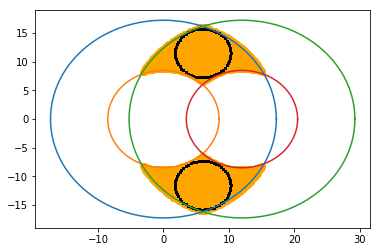

In [22]:
# отрисовка рабочей области
print('Robot work area:')
fig, ax = plt.subplots(1)
ax.plot(x1, x2)
ax.plot(x3, x4)
ax.plot(x5, x6)
ax.plot(x7, x8)
plt.scatter(*zip(*work_space), color = 'orange')
plt.scatter(*zip(*sing_xy1), color = 'black', s=0.5)
plt.scatter(*zip(*sing_xy2), color = 'black', s=0.5)
# plt.scatter(*zip(*gran), color = 'black')
plt.show()

In [0]:
def f4(x):
    return (x[3]-x[2]-np.pi)**2

def f5(x):
    return (la*np.cos(x[0])+lc*np.cos(x[2]) - ( d + la*np.cos(x[1])+lc*np.cos(x[3])) )**2

def f6(x):
    return (la*np.sin(x[0])+lc*np.sin(x[2]) - la*np.sin(x[1])-lc*np.sin(x[3]) )**2


def F2(x):
    return f4(x)+f5(x)+f6(x)

In [0]:
# x0 = [1, 3, 1, 0.7]
x0 = [0.95, 3, 1,3]
res2 = minimize(F2, x0, method='Nelder-Mead', tol=1e-9)
res2.x

In [0]:
res2.x[1]-res2.x[0]

In [0]:
np.pi*(20/100)

0.6283185307179586

In [0]:
#генерирую всевозможные углы
theta1 = np.linspace(0.89522253, 0.89522253, 60)
theta2 = np.linspace(1.22830265, 1.22830265, 60)
phi1 = np.linspace(0, 2*np.pi, 60)
phi2 = np.linspace(0, 2*np.pi, 60)
sing3 = []
sing4 = []

def dj2(t1,t2,p1,p2):
#     if np.abs(p1-p2) < tol:
#         sing1.append([t1,t2,p1,p2])
#         return 0
    if (p2-p1-np.pi) < tol:
        sing3.append([t1,t2,p1,p2])
        return 0
    return 0

In [0]:
#перебираю все комбинации углов на удовлетворение условиям сингулярности
for i in range(len(theta1)):
    for j in range(len(theta2)):
        for k in range(len(phi1)):
            for m in range(len(phi2)):
                dj2(theta1[i], theta2[j], phi1[k], phi2[m])

Robot singularity area:


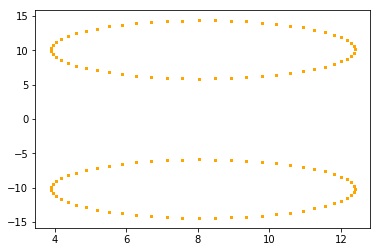

In [26]:
#HERE2

#отсеиваю те углы, которые не подходят по условиям закрытости цепи и получаю коордитаны линий сингулярности в х и у
#с чистыми уравнениями связи
sing_xy3 = []
sing_xy4 = []
aa = []
for i in range(len(sing3)):
    #aa.append(np.abs(lc*np.cos(sing1[i][0])+la*np.cos(sing1[i][2]) - ( d + lc*np.cos(sing1[i][1])+la*np.cos(sing1[i][3])) ))
    if np.abs(la*np.cos(sing3[i][0])+lc*np.cos(sing3[i][2]) - ( d + la*np.cos(sing3[i][1])+lc*np.cos(sing3[i][3])) ) <= tol*1000:
#         print("aaaaa")
        if np.abs(la*np.sin(sing3[i][0])+lc*np.sin(sing3[i][2]) - la*np.sin(sing3[i][1])-lc*np.sin(sing3[i][3]) ) <= tol*1000:
#             print("bbbbb")
            sing_xy3.append( [ la*np.cos(sing3[i][0])+lc*np.cos(sing3[i][2]), la*np.sin(sing3[i][0])+lc*np.sin(sing3[i][2])] )
            sing_xy4.append( [ la*np.cos(sing3[i][0])+lc*np.cos(sing3[i][2]), -la*np.sin(sing3[i][0])-lc*np.sin(sing3[i][2])] )  
#строю линии сингулярности в координатах х у
print('Robot singularity area:')
plt.scatter(*zip(*sing_xy3), color = 'orange', s=0.5)
plt.scatter(*zip(*sing_xy4), color = 'orange', s=0.5)
plt.show()

Robot work area:


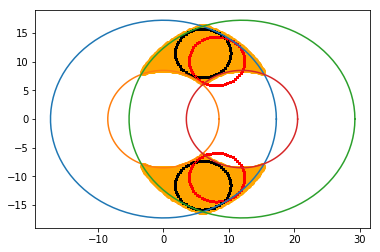

In [29]:
# отрисовка рабочей области
print('Robot work area:')
fig, ax = plt.subplots(1)
ax.plot(x1, x2)
ax.plot(x3, x4)
ax.plot(x5, x6)
ax.plot(x7, x8)
plt.scatter(*zip(*work_space), color = 'orange')
plt.scatter(*zip(*sing_xy1), color = 'black', s=0.25)
plt.scatter(*zip(*sing_xy2), color = 'black', s=0.25)
plt.scatter(*zip(*sing_xy3), color = 'red', s=0.25)
plt.scatter(*zip(*sing_xy4), color = 'red', s=0.25)
# plt.scatter(*zip(*gran), color = 'black')
plt.show()